<a href="https://colab.research.google.com/github/Tianea2160/PythonPractice/blob/master/ensemble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()
data_df = pd.DataFrame(cancer.data, columns= cancer.feature_names)

In [ ]:
# voting 앙상블 기법
lr_clf = LogisticRegression()
KN_clf = KNeighborsClassifier(n_neighbors=8)

vo_clf = VotingClassifier(estimators=[('LR', lr_clf),('KNN', KN_clf)],voting='soft')

x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=156)

vo_clf.fit(x_train, y_train)
pred = vo_clf.predict(x_test)
print('voting',accuracy_score(pred, y_test))

clfs = [lr_clf, KN_clf]

for clf in clfs:
  clf.fit(x_train, y_train)
  pred = clf.predict(x_test)
  print(clf, accuracy_score(pred, y_test))

voting 0.9473684210526315
LogisticRegression() 0.9385964912280702
KNeighborsClassifier(n_neighbors=8) 0.9385964912280702


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [18]:
from google.colab import files
files.upload()

Saving UCI HAR Dataset.zip to UCI HAR Dataset.zip


In [19]:
!unzip -qq "UCI HAR Dataset.zip"

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

def get_new_feature_name_df(old_feature_name_df):
  feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby("column_name").cumcount(), columns=['dup_cnt'])
  feature_dup_df = feature_dup_df.reset_index()
  new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
  new_feature_name_df['column_name'] = new_feature_name_df[['column_name','dup_cnt']].apply(lambda x:x[0]+'_' + str(x[1]) if x[1]>0 else x[0], axis=1)
                                                  
  new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
  return new_feature_name_df


In [23]:
def get_human_dataset():
  feature_name_df = pd.read_csv('./dataset/features.txt', sep='\s+', header=None, names=['column_index', 'column_name'])
  new_feature_name_df = get_new_feature_name_df(feature_name_df)
  feature_name = new_feature_name_df.iloc[:,1].values.tolist()

  x_train = pd.read_csv('./dataset/train/X_train.txt', sep='\s+', names=feature_name)
  x_test = pd.read_csv('./dataset/test/X_test.txt', sep='\s+', names=feature_name)
  y_train = pd.read_csv('./dataset/train/y_train.txt', sep='\s+', header = None, names=['action'])
  y_test = pd.read_csv('./dataset/test/y_test.txt', sep='\s+', header = None, names=['action'])

  return x_train, x_test, y_train, y_test

x_train, x_test, y_train, y_test = get_human_dataset()

In [26]:
print(x_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None


In [27]:
!pip install 'neptune-contrib[monitoring]>=0.24.9'

     |████████████████████████████████| 74 kB 2.6 MB/s 
     |████████████████████████████████| 300 kB 48.4 MB/s 
     |████████████████████████████████| 100 kB 8.9 MB/s 
     |████████████████████████████████| 106 kB 56.2 MB/s 
     |████████████████████████████████| 98 kB 7.4 MB/s 
     |████████████████████████████████| 175 kB 74.0 MB/s 
     |████████████████████████████████| 527 kB 39.9 MB/s 
     |████████████████████████████████| 925 kB 55.7 MB/s 
     |████████████████████████████████| 829 kB 59.8 MB/s 
     |████████████████████████████████| 53 kB 1.7 MB/s 
     |████████████████████████████████| 180 kB 58.2 MB/s 
     |████████████████████████████████| 131 kB 53.9 MB/s 
     |████████████████████████████████| 79 kB 7.1 MB/s 
     |████████████████████████████████| 8.5 MB 38.4 MB/s 
     |████████████████████████████████| 138 kB 43.0 MB/s 
     |████████████████████████████████| 63 kB 1.7 MB/s 
     |████████████████████████████████| 396 kB 57.1 MB/s 
     |███████████████████

In [30]:
import xgboost as xgb
from xgboost import XGBClassifier, plot_importance
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
# 파이썬기반의 xgb
dataset = load_breast_cancer()
x_features = dataset.data
y_label = dataset.target

cancer_df = pd.DataFrame(data=x_features, columns=dataset.feature_names)
cancer_df['target'] = y_label
cancer_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [32]:
x_train, x_test, y_train, y_test = train_test_split(x_features, y_label, test_size=0.2, random_state=156)

print(x_train.shape, x_test.shape)


dtrain = xgb.DMatrix(data=x_train, label=y_train)
dtest = xgb.DMatrix(data=x_test, label=y_test)

params = {'max_depth':3,
          'objectice':'binary:logistic',
          'eval_metric':'logloss',
          'early_stoppings':100
          }
num_rounds = 400

wlist = [(dtrain, 'train'),(dtest,'test')]

xgb_model = xgb.train(params, dtrain=dtrain, num_boost_round=num_rounds, early_stopping_rounds=100, evals=wlist)

(455, 30) (114, 30)
[0]	train-logloss:0.455589	test-logloss:0.465357
Multiple eval metrics have been passed: 'test-logloss' will be used for early stopping.

Will train until test-logloss hasn't improved in 100 rounds.
[1]	train-logloss:0.318473	test-logloss:0.341107
[2]	train-logloss:0.229916	test-logloss:0.262828
[3]	train-logloss:0.17133	test-logloss:0.210299
[4]	train-logloss:0.132161	test-logloss:0.175303
[5]	train-logloss:0.102581	test-logloss:0.150374
[6]	train-logloss:0.081109	test-logloss:0.126925
[7]	train-logloss:0.066995	test-logloss:0.116496
[8]	train-logloss:0.056892	test-logloss:0.10742
[9]	train-logloss:0.048718	test-logloss:0.099669
[10]	train-logloss:0.041125	test-logloss:0.095912
[11]	train-logloss:0.037893	test-logloss:0.094926
[12]	train-logloss:0.035209	test-logloss:0.093779
[13]	train-logloss:0.034089	test-logloss:0.09406
[14]	train-logloss:0.032559	test-logloss:0.093095
[15]	train-logloss:0.0313	test-logloss:0.093265
[16]	train-logloss:0.030022	test-logloss:0.09

In [36]:
pred_probs = xgb_model.predict(dtest)
print("predict : ")
print(np.round(pred_probs[:10],3))
print(type(pred_probs))

predict : 
[ 0.73   0.004  0.858  0.282  0.98   0.995  0.955  0.994  0.988 -0.007]
<class 'numpy.ndarray'>


In [39]:
#사이킷런 기반의 xgb
xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
xgb_wrapper.fit(x_train, y_train)
pred = xgb_wrapper.predict(x_test)
pred_proba = xgb_wrapper.predict_proba(x_test)[:,1]

print(accuracy_score(pred, y_test))

0.9736842105263158


In [42]:
evals = [(x_test, y_test)]
xgb_wrapper.fit(x_train, y_train, early_stopping_rounds=100, eval_metric="logloss", eval_set=evals, verbose=True)
pred = xgb_wrapper.predict(x_test)
pred_proba = xgb_wrapper.predict_proba(x_test)[:,1]

[0]	validation_0-logloss:0.61352
Will train until validation_0-logloss hasn't improved in 100 rounds.
[1]	validation_0-logloss:0.547842
[2]	validation_0-logloss:0.494247
[3]	validation_0-logloss:0.447986
[4]	validation_0-logloss:0.409109
[5]	validation_0-logloss:0.374977
[6]	validation_0-logloss:0.345714
[7]	validation_0-logloss:0.320529
[8]	validation_0-logloss:0.29721
[9]	validation_0-logloss:0.277991
[10]	validation_0-logloss:0.260302
[11]	validation_0-logloss:0.246037
[12]	validation_0-logloss:0.231556
[13]	validation_0-logloss:0.22005
[14]	validation_0-logloss:0.208572
[15]	validation_0-logloss:0.199993
[16]	validation_0-logloss:0.190118
[17]	validation_0-logloss:0.181818
[18]	validation_0-logloss:0.174729
[19]	validation_0-logloss:0.167657
[20]	validation_0-logloss:0.158202
[21]	validation_0-logloss:0.154725
[22]	validation_0-logloss:0.148947
[23]	validation_0-logloss:0.143308
[24]	validation_0-logloss:0.136344
[25]	validation_0-logloss:0.132778
[26]	validation_0-logloss:0.127912

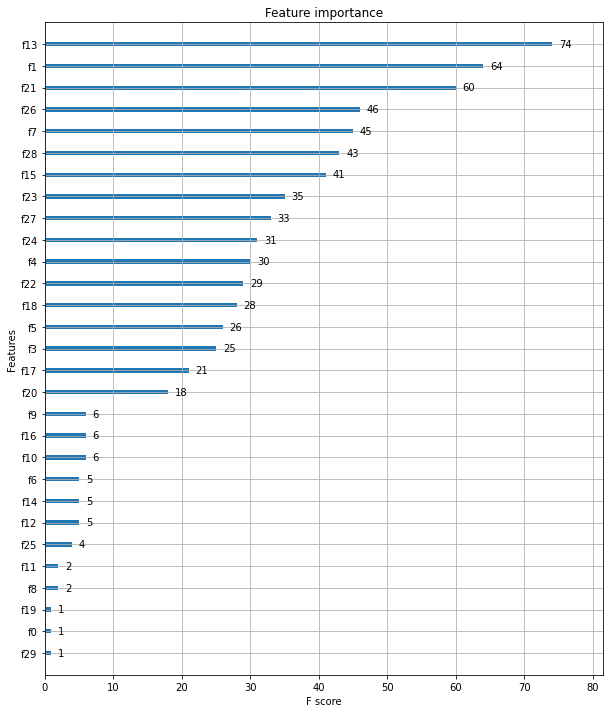

In [44]:
fig, ax = plt.subplots(figsize=(10,12))
plot_importance(xgb_wrapper, ax=ax)